# 1. Make classification data and get it ready

In [ ]:
import sklearn
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Make a dataframe of circle data
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


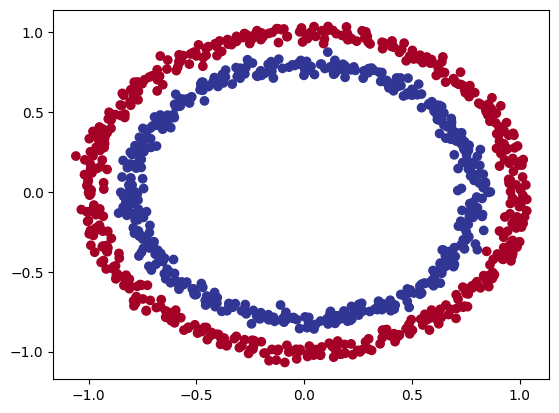

In [ ]:
# visualize

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

## 1.1 Check input and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first sample of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of x: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of x: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of x: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Splite data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Building a model

In [ ]:
# Import pytorch and nn
import torch
from torch import nn

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # # Use nn.Sequential for creating layers
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  # define a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))    # x -> layer_1 -> layer_2 -> output
    # return self.two_linear_layers(x)    # x -> two_linear_layers -> output

# Instantiate an instance of the model
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# replicating the model using nn.sequence

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1498, -0.0139],
                      [-0.7001,  0.6396],
                      [ 0.4608, -0.1383],
                      [ 0.3645,  0.3487],
                      [ 0.4223,  0.0311]])),
             ('layer_1.bias',
              tensor([-0.3713, -0.1277,  0.1201,  0.3919,  0.6763])),
             ('layer_2.weight',
              tensor([[ 0.4085,  0.2724, -0.0959, -0.1972, -0.3640]])),
             ('layer_2.bias', tensor([0.4393]))])

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1539,  0.4912],
                      [-0.1375, -0.1409],
                      [-0.2321, -0.4286],
                      [ 0.7014,  0.5094],
                      [-0.3268,  0.2275]])),
             ('0.bias', tensor([ 0.4519,  0.1708,  0.2550,  0.5286, -0.3250])),
             ('1.weight',
              tensor([[ 0.1763,  0.1455,  0.0620, -0.0064,  0.1138]])),
             ('1.bias', tensor([-0.2098]))])

In [ ]:
# Make predictions - will be using only model_0 from now on
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[ 0.1371],
        [ 0.0093],
        [ 0.1664],
        [ 0.1300],
        [-0.3185],
        [-0.3927],
        [-0.3680],
        [-0.4634],
        [ 0.1868],
        [-0.0046]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup a loss function and optimizer

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# 3. Create a training and testing loop

In [ ]:
# check raw outputs of our model before activation and threshold
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_train.to(device)[:5])
y_logits


tensor([[-0.3922],
        [-0.4092],
        [ 0.3079],
        [ 0.2808],
        [ 0.0657]])

In [ ]:
# use sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4032],
        [0.3991],
        [0.5764],
        [0.5697],
        [0.5164]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))[:5])

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()

tensor([False, False,  True,  True, False])


tensor([0., 0., 1., 1., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.1 Building a training loop

In [ ]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)

  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.703149 | Acc: 49.88% | Test loss: 0.69960 | Test accuracy: 47.00%
Epoch: 10 | Loss: 0.699710 | Acc: 49.88% | Test loss: 0.69698 | Test accuracy: 48.00%
Epoch: 20 | Loss: 0.697844 | Acc: 50.50% | Test loss: 0.69559 | Test accuracy: 48.50%
Epoch: 30 | Loss: 0.696663 | Acc: 50.75% | Test loss: 0.69473 | Test accuracy: 48.50%
Epoch: 40 | Loss: 0.695841 | Acc: 50.62% | Test loss: 0.69415 | Test accuracy: 49.00%
Epoch: 50 | Loss: 0.695237 | Acc: 50.50% | Test loss: 0.69374 | Test accuracy: 50.00%
Epoch: 60 | Loss: 0.694780 | Acc: 50.75% | Test loss: 0.69346 | Test accuracy: 49.50%
Epoch: 70 | Loss: 0.694428 | Acc: 50.75% | Test loss: 0.69326 | Test accuracy: 49.00%
Epoch: 80 | Loss: 0.694155 | Acc: 50.62% | Test loss: 0.69313 | Test accuracy: 49.50%
Epoch: 90 | Loss: 0.693940 | Acc: 50.38% | Test loss: 0.69305 | Test accuracy: 49.50%


# 4. Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Dowmload helper functions from Learn PyTorch
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


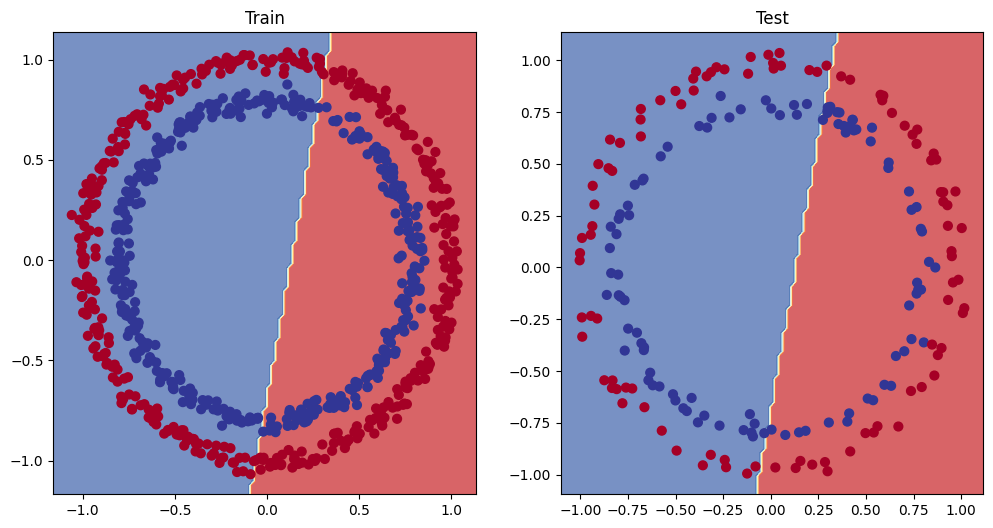

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving the model

1. Add more layers
2. Add more hidden units
3. Fit for longer
4. Changing the activation functions
5. Change the learning rate
6. Change the loss functions

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop
torch.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


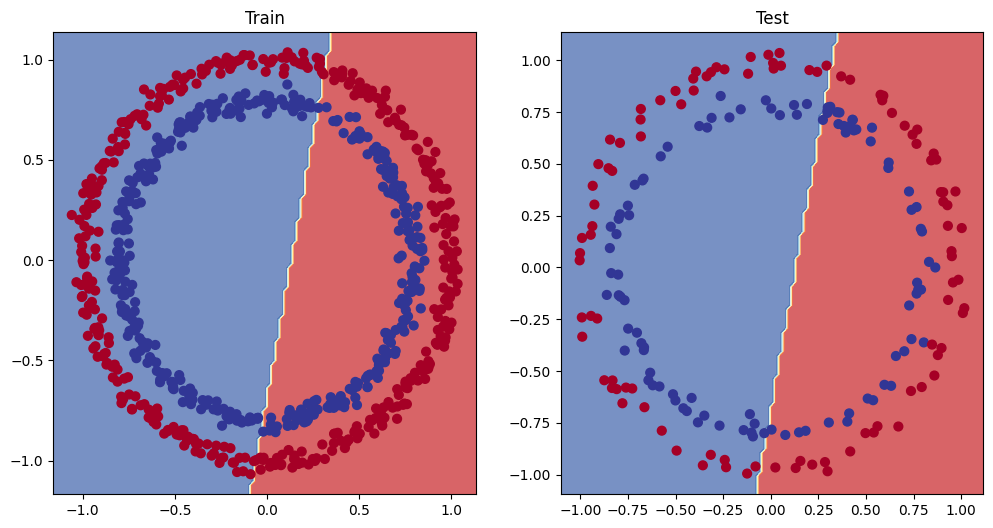

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 6. Building a model with Non-Linearity

In [ ]:
# Build a model with non-linear activation function

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # ReLU is a non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## 6.1 Training a model with non-linearity

In [ ]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  model_2.train()

  # 1. Forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss - loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print what's happening
  if epoch % 100 == 0:
    print(f"Epoch:  {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch:  0 | Loss: 0.6929 | Acc: 50.00% | Test Loss: 0.6947 | Test Acc: 50.00%
Epoch:  100 | Loss: 0.6912 | Acc: 52.88% | Test Loss: 0.6947 | Test Acc: 52.50%
Epoch:  200 | Loss: 0.6898 | Acc: 53.37% | Test Loss: 0.6947 | Test Acc: 55.00%
Epoch:  300 | Loss: 0.6879 | Acc: 53.00% | Test Loss: 0.6947 | Test Acc: 56.00%
Epoch:  400 | Loss: 0.6852 | Acc: 52.75% | Test Loss: 0.6947 | Test Acc: 56.50%
Epoch:  500 | Loss: 0.6810 | Acc: 52.75% | Test Loss: 0.6947 | Test Acc: 56.50%
Epoch:  600 | Loss: 0.6751 | Acc: 54.50% | Test Loss: 0.6947 | Test Acc: 56.00%
Epoch:  700 | Loss: 0.6666 | Acc: 58.38% | Test Loss: 0.6947 | Test Acc: 59.00%
Epoch:  800 | Loss: 0.6516 | Acc: 64.00% | Test Loss: 0.6947 | Test Acc: 67.50%
Epoch:  900 | Loss: 0.6236 | Acc: 74.00% | Test Loss: 0.6947 | Test Acc: 79.00%


## 6.2 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

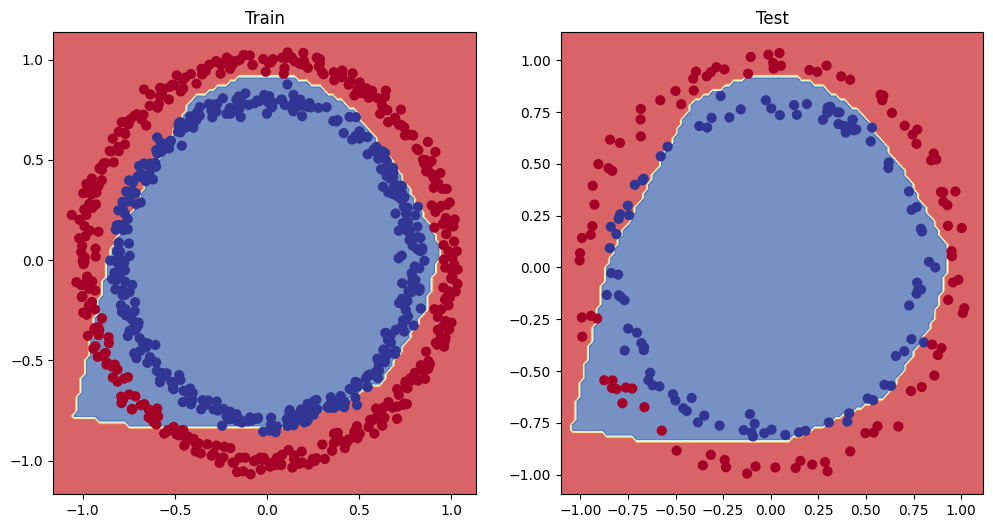

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

# 7. Replicating non-linear activation functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

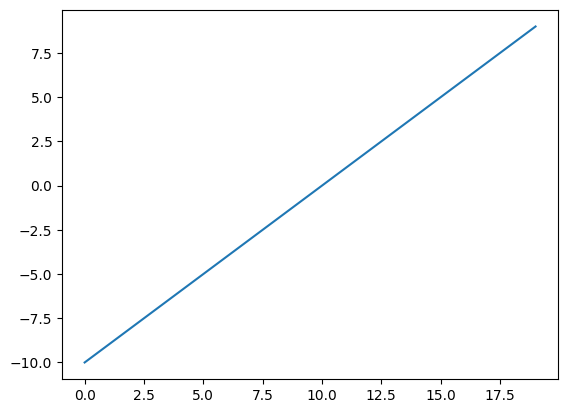

In [ ]:
# Visualize the tensor
plt.plot(A)

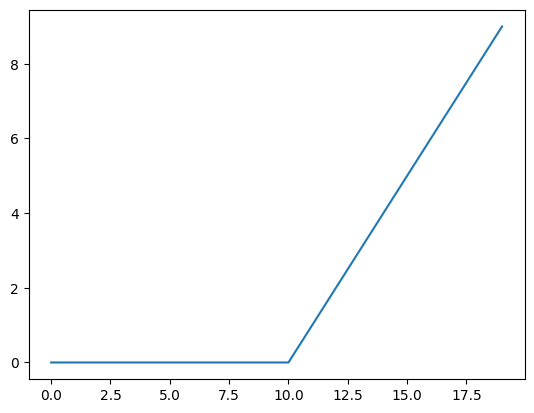

In [ ]:
plt.plot(torch.relu(A))

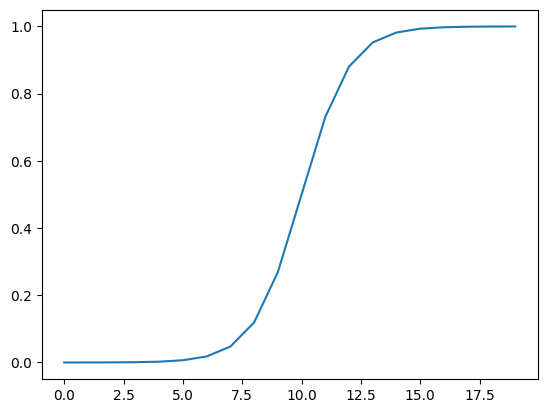

In [ ]:
plt.plot(torch.sigmoid(A))

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

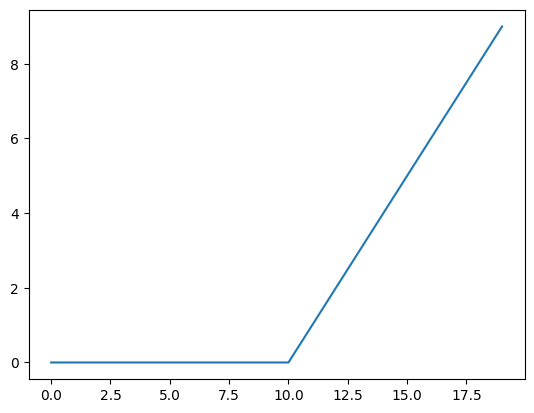

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A))

# 8. Putting it all together with multi-class classification

## 8.1 Creating a multi-class dataset

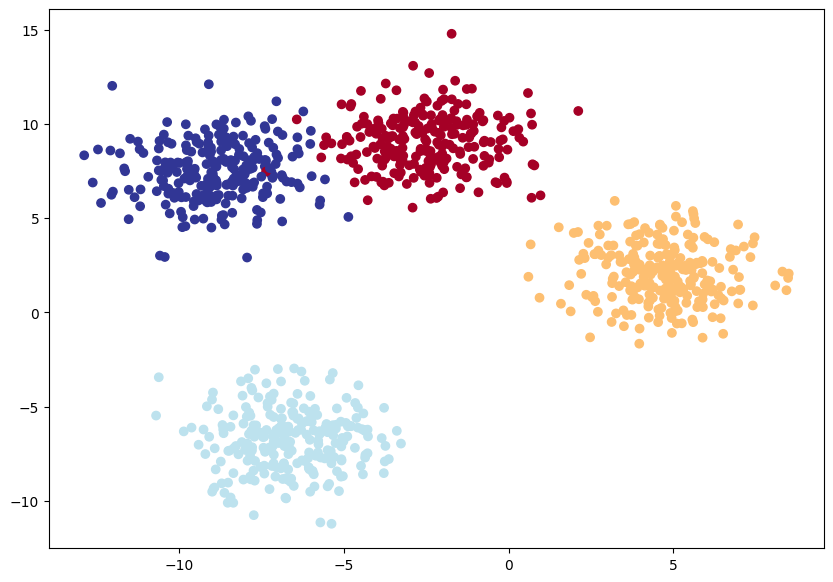

In [60]:
# Import dependancies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

## 8.2 Building a multi-class classification model

In [ ]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 Create a loss function and an optimizer

In [ ]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

## 8.4 Getting prediction probabilities for multi-class model

In [ ]:
# Get raw outputs
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.0027,  0.1093,  0.0326, -0.0658],
        [-0.1063,  0.0286, -0.0376, -0.0791],
        [-0.6198, -0.3038, -0.5571,  0.0565],
        [-0.0544,  0.0686, -0.0215, -0.0883],
        [ 0.0044,  0.1148,  0.0399, -0.0628],
        [-0.1826,  0.0136, -0.1475, -0.0999],
        [-0.5720, -0.2212, -0.5233, -0.0021],
        [-0.0141,  0.0448,  0.0644, -0.0447],
        [-0.7441, -0.4310, -0.6639,  0.1345],
        [-0.0146,  0.0920,  0.0285, -0.0669]])

In [ ]:
# convert logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[0.2443, 0.2733, 0.2531, 0.2294],
        [0.2357, 0.2697, 0.2524, 0.2422],
        [0.1851, 0.2539, 0.1971, 0.3640],
        [0.2421, 0.2738, 0.2502, 0.2340],
        [0.2446, 0.2732, 0.2535, 0.2287],
        [0.2305, 0.2804, 0.2387, 0.2504],
        [0.1909, 0.2711, 0.2004, 0.3375],
        [0.2432, 0.2579, 0.2630, 0.2359],
        [0.1707, 0.2334, 0.1849, 0.4109],
        [0.2436, 0.2710, 0.2543, 0.2312]])


In [ ]:
# Convert prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3,
        3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2,
        1, 2, 3, 1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1,
        1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 3,
        3, 1, 1, 1, 3, 2, 2, 2, 3, 1, 1, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 3,
        3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 3, 1, 1, 3, 2, 1, 3, 2,
        3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 2, 2,
        1, 1, 3, 2, 1, 1, 3, 1])

## 8.5 Create a training loop and testing loop

In [62]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)
  # Print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.4211 | Acc: 29.88% | Test Loss: 1.3768 | Test Acc: 26.50%
Epoch: 10 | Loss: 1.0656 | Acc: 64.88% | Test Loss: 1.0387 | Test Acc: 60.50%
Epoch: 20 | Loss: 0.9639 | Acc: 69.62% | Test Loss: 0.9372 | Test Acc: 69.00%
Epoch: 30 | Loss: 0.8405 | Acc: 84.38% | Test Loss: 0.8009 | Test Acc: 89.50%
Epoch: 40 | Loss: 0.6346 | Acc: 91.38% | Test Loss: 0.5855 | Test Acc: 94.50%
Epoch: 50 | Loss: 0.4218 | Acc: 93.38% | Test Loss: 0.3903 | Test Acc: 95.50%
Epoch: 60 | Loss: 0.3175 | Acc: 96.12% | Test Loss: 0.2943 | Test Acc: 98.50%
Epoch: 70 | Loss: 0.2534 | Acc: 97.38% | Test Loss: 0.2337 | Test Acc: 98.50%
Epoch: 80 | Loss: 0.2060 | Acc: 98.50% | Test Loss: 0.1890 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.1697 | Acc: 98.62% | Test Loss: 0.1549 | Test Acc: 99.50%
